In [1]:
from keras.datasets import imdb
import numpy as np

Using TensorFlow backend.


# data prep

In [2]:
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(XT, YT), (Xt, Yt) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [3]:
len(XT)

25000

In [4]:
# print(XT[0])

In [5]:
word_idx = imdb.get_word_index()

In [6]:
# print(word_idx.items())

In [7]:
idx_word = dict([[value,key] for (key,value) in word_idx.items()])

In [8]:
# print(idx_word)

In [9]:
actual_review = ' '.join([idx_word.get(idx-3,'?') for idx in XT[0]])

In [10]:
# print(actual_review)

## Vectorization

In [20]:
# vocab size = 10000

def vectorize_sentences(sentences,dim=10000):
    outputs = np.zeros((len(sentences),dim))
    
    for i,idx in enumerate(sentences):
        outputs[i,idx] = 1
    return outputs
            
        
        

In [21]:
X_train = vectorize_sentences(XT)
X_test = vectorize_sentences(Xt)

In [25]:
Y_train = np.asarray(YT).astype('float32')
Y_test = np.asarray(Yt).astype('float32')

# Built a Network

In [72]:
from keras import models
from keras.layers import Dense

In [73]:
model = models.Sequential()

model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [74]:
# Compile model

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [75]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_17 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


# training and validation

In [76]:
x_val = X_train[:5000]
x_trainNew = X_train[5000:]

y_val = Y_train[:5000]
y_trainNew = Y_train[5000:]

In [77]:
hist = model.fit(x_trainNew,y_trainNew,epochs=4,batch_size=512,validation_data=(x_val,y_val)) 

Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 6s 316us/step - loss: 0.4642 - acc: 0.8132 - val_loss: 0.3483 - val_acc: 0.8772
Epoch 2/4
20000/20000 [==============================] - 5s 231us/step - loss: 0.2742 - acc: 0.9084 - val_loss: 0.2973 - val_acc: 0.8822
Epoch 3/4
20000/20000 [==============================] - 3s 169us/step - loss: 0.2085 - acc: 0.9294 - val_loss: 0.2690 - val_acc: 0.8926
Epoch 4/4
20000/20000 [==============================] - 3s 160us/step - loss: 0.1703 - acc: 0.9425 - val_loss: 0.2701 - val_acc: 0.8942


In [78]:
import matplotlib.pyplot as plt

In [79]:
h = hist.history

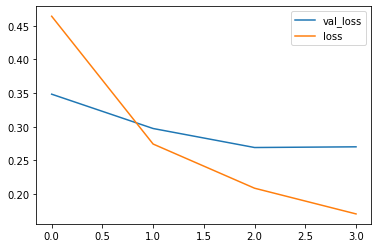

In [80]:
plt.plot(h['val_loss'],label="val_loss")
plt.plot(h['loss'],label="loss")
plt.legend()

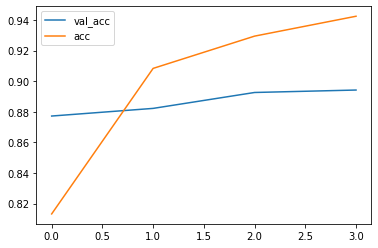

In [81]:
plt.plot(h['val_acc'],label="val_acc")
plt.plot(h['acc'],label="acc")
plt.legend()

In [82]:
model.evaluate(X_test,Y_test)[1]

25000/25000 [==============================] - 5s 187us/step


0.88328

In [83]:
model.evaluate(X_train,Y_train)[1]

25000/25000 [==============================] - 3s 139us/step


0.94676

In [84]:
model.predict(X_test)

array([[0.24378178],
       [0.9995537 ],
       [0.81948817],
       ...,
       [0.15713999],
       [0.11232609],
       [0.45743307]], dtype=float32)